In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# --- Дані ---
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)   # (60000, 28, 28)
print(y_train.shape)   # (60000,)
print(x_test.shape)    # (10000, 28, 28)
print(y_test.shape)    # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


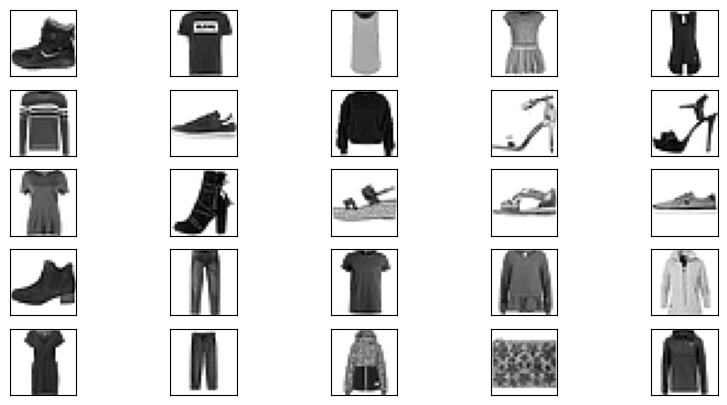

In [4]:
#робимо стандартизацію
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_cat=keras.utils.to_categorical(y_train,10)
y_test_cat=keras.utils.to_categorical(y_test  ,10)

# Виводимо перші 25 зображень
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Sveta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:

# навчання берем 10 епох 
history = model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    verbose=2  # або verbose=1
)

    

Epoch 1/10
1500/1500 - 14s - 9ms/step - accuracy: 0.8199 - loss: 0.4951 - val_accuracy: 0.8561 - val_loss: 0.3910
Epoch 2/10
1500/1500 - 11s - 7ms/step - accuracy: 0.8843 - loss: 0.3209 - val_accuracy: 0.8905 - val_loss: 0.3001
Epoch 3/10
1500/1500 - 11s - 7ms/step - accuracy: 0.8992 - loss: 0.2768 - val_accuracy: 0.9002 - val_loss: 0.2735
Epoch 4/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9098 - loss: 0.2445 - val_accuracy: 0.9021 - val_loss: 0.2631
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9194 - loss: 0.2194 - val_accuracy: 0.8918 - val_loss: 0.2942
Epoch 6/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9249 - loss: 0.2003 - val_accuracy: 0.9090 - val_loss: 0.2642
Epoch 7/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9334 - loss: 0.1790 - val_accuracy: 0.9114 - val_loss: 0.2639
Epoch 8/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9402 - loss: 0.1624 - val_accuracy: 0.9142 - val_loss: 0.2481
Epoch 9/10
1500/1500 - 13s - 9ms/step - accuracy: 0.9468 - loss: 0.1460 - val_accuracy: 

In [9]:
model.evaluate(x_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9117 - loss: 0.2864


[0.28643521666526794, 0.9117000102996826]

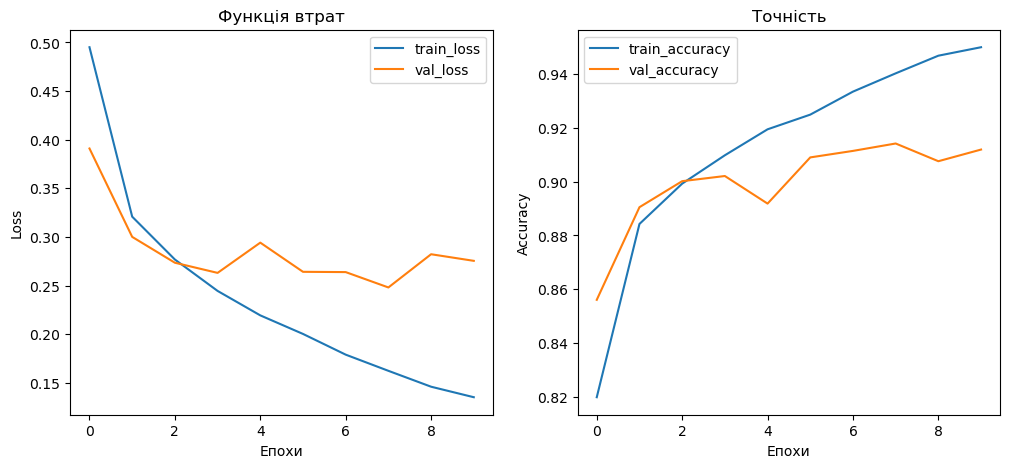

In [10]:
# графіки залежності зміни точності і втрат від кроку
# точність повинна зростати, а втрати зменшуватись

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# --- Графік функції втрат ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Функція втрат")
plt.xlabel("Епохи")
plt.ylabel("Loss")
plt.legend()

# --- Графік точності ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Точність")
plt.xlabel("Епохи")
plt.ylabel("Accuracy")
plt.legend()

plt.show()



Точність на тестових даних: 0.9117
Модель помиляється у 8.83% випадків


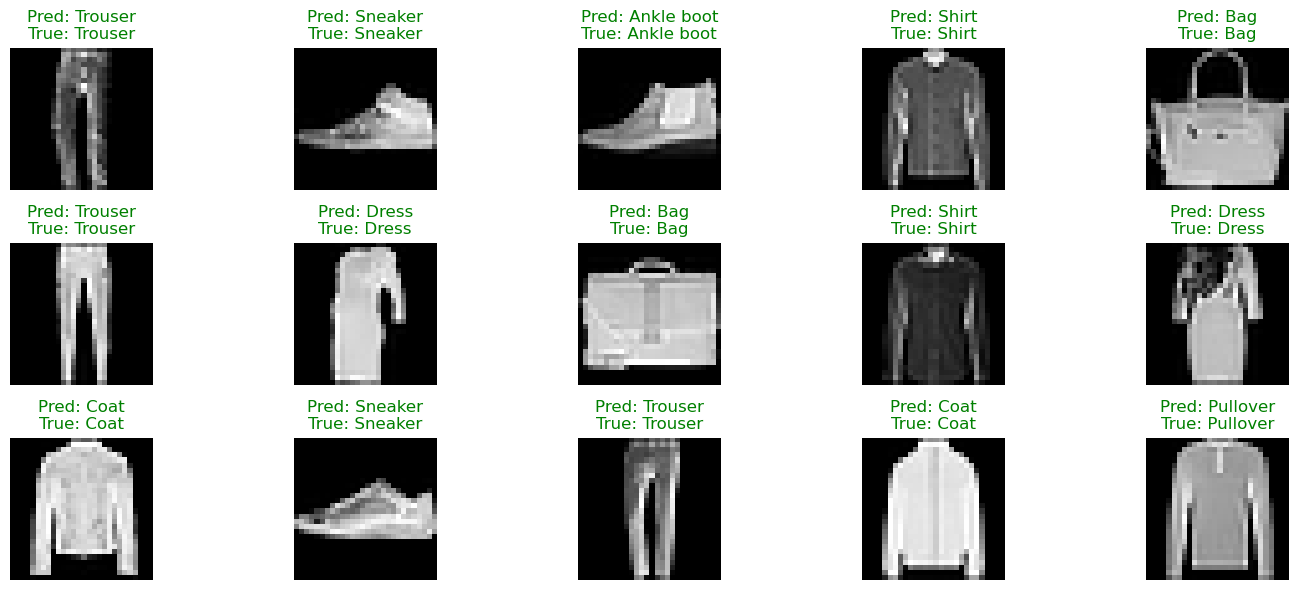

In [11]:
# вивод 15 випадкових передбачених зображень
import random
import matplotlib.pyplot as plt
import numpy as np

class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

# передбачення
pred_all = model.predict(x_test, verbose=0)
pred_classes = np.argmax(pred_all, axis=1)

# правильні класи
true_classes = np.argmax(y_test, axis=1) if y_test.ndim == 2 else y_test

# точність
accuracy = np.mean(pred_classes == true_classes)
print(f"Точність на тестових даних: {accuracy:.4f}")
print(f"Модель помиляється у {100*(1-accuracy):.2f}% випадків")

#15 випадкових зображень
plt.figure(figsize=(15, 6))
for i in range(15):
    idx = random.randint(0, x_test.shape[0] - 1)
    img = x_test[idx].reshape(28, 28)
    
    true_label_idx = true_classes[idx]
    pred_label_idx = pred_classes[idx]
    
    true_label = class_names[true_label_idx]
    pred_label = class_names[pred_label_idx]

    plt.subplot(3, 5, i+1)
    plt.imshow(img, cmap="gray")
    color = "green" if pred_label_idx == true_label_idx else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()
